# CS216 : Assignment 3

Reading: Boykov & Jolly, ICCV 2001

For written problems, you can either use Markdown/LaTeX to directly enter your reponse in the provided notebook cell, or if you prefer, write out by hand and embed a photo of your solution. For coding problems, I have provided some suggestion of how to structure your code but feel free to modify or ignore as you see fit.

For this assignment we will use the PyMaxflow package.  You can install it from the commandline via "pip install pymaxflow"

Please edit the cell below to include your name and student ID #

In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Color Quantization

k-means clustering can be used to reduce the color
palette of an image.  Write a function that takes a color image and a value for
$k$ and returns a new version of the image which uses only $k$ distinct colors.
Your code should cluster the pixel color values using k-means and then produce
a new image where each pixel is replaced with the color of the closest cluster center.

You are welcome to use the **kmeans** function provided by **scipy**.
Demonstrate your code on a (colorful) image for different values of $k =
{2,5,10}$.  Describe how the clustering changes if you scale one of the feature
coordinates, say the $R$ (red) value by a factor of $1000$?  You can test this
by first multiplying the $R$ channel by 1000 and performing the clustering and
then dividing the R channel in the resulting quantized image by 1000 prior to
displaying it.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


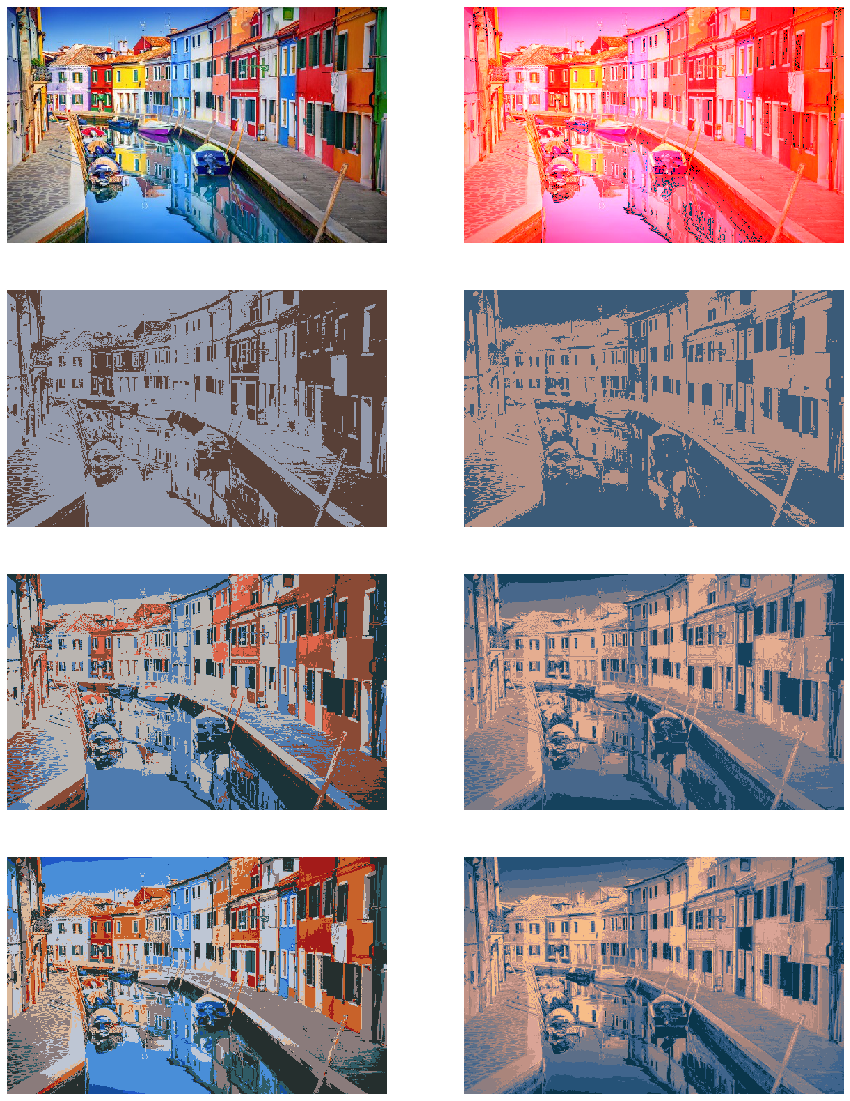

In [24]:
image = plt.imread('kmeans.jpg')

image = image.astype(np.float32)
image = image/255.0
image_reshaped = image.reshape((-1,3))

# image_red = image
image_red[:,:,0] = image[:,:,0]*1000
image_red_reshaped = image_red.reshape((-1,3))

K = [2,5,10]
# stop the k-means after 10 iterations or if 1.0 accuracy is achieved
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.axis('off')
plt.imshow(image)
plt.subplot(4,2,2)
plt.axis('off')
plt.imshow(image_red)

i=3
for k in K:
    # labels denote which center the pixel is nearest to
    _, labels, centers = cv2.kmeans(image_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    k_color_image = centers[labels.flatten()] # replace original pixel values by closest center value
    k_color_image = k_color_image.reshape((image.shape))
    plt.subplot(4,2,i)
    plt.axis('off')
    plt.imshow(k_color_image)
    i+=1
    
    _, labels_red, centers_red = cv2.kmeans(image_red_reshaped, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    k_color_image_red = centers_red[labels_red.flatten()]
    k_color_image_red = k_color_image_red.reshape((image.shape))
    k_color_image_red[:,:,0] = k_color_image_red[:,:,0]/1000
    plt.subplot(4,2,i)
    plt.axis('off')
    plt.imshow(k_color_image_red)
    i+=1
    
plt.show()

The warm colors are much finely segmented than the blues and greens.